In [8]:
# В этом проекте и последующих я буду повторять примеры из оф. документации. ЭТОт примерр Hello, KAN!

In [9]:
from kan import *
from numpy.ma.core import masked

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

checkpoint directory created: ./model
saving model version 0.0


In [10]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

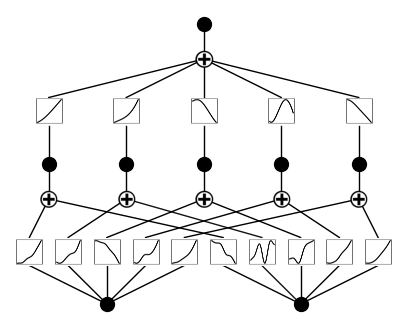

In [11]:
# plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

In [12]:
# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);


| train_loss: 1.01e-01 | test_loss: 9.43e-02 | reg: 2.52e+01 | : 100%|█| 20/20 [00:05<00:00,  3.51it

saving model version 0.1


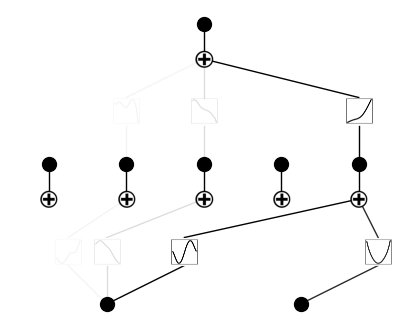

In [13]:
model.plot()

saving model version 0.2


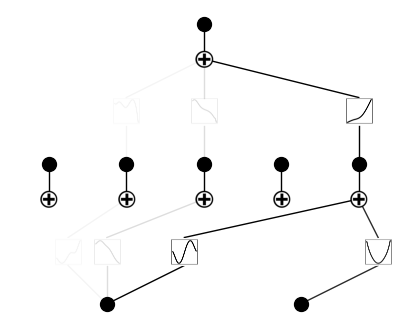

In [14]:
model.prune()
model.plot()

saving model version 0.2


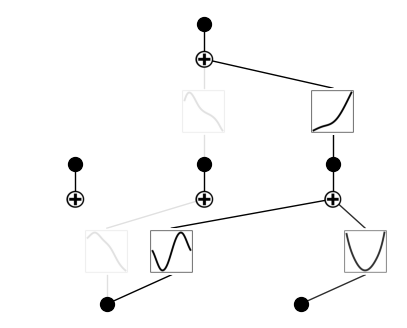

In [15]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [16]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 50/50 [00:09<00:00,  5.52it/s]

saving model version 0.3


ValueError: alpha (nan) is outside 0-1 range

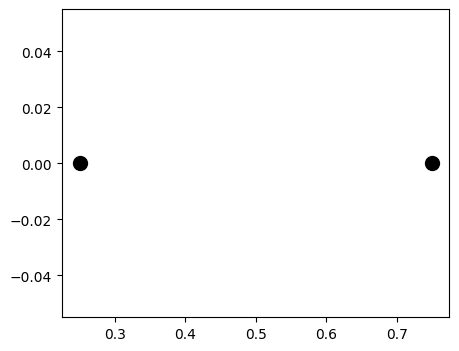

In [17]:
model.plot()

In [ ]:
model.symbolic_formula()[0][0]

In [19]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.999973714351654, c=2
fixing (0,1,0) with x^2, r2=0.9999988079071045, c=2
fixing (1,0,0) with exp, r2=0.9999990463256836, c=2
saving model version 0.5


In [21]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 50/50 [00:06<00:00,  7.29it/s]

saving model version 0.7


Должно было получиться: train loss: 2.02e-10 | test loss: 1.13e-10 | reg: 2.98e+00 : 100%|██| 50/50 [00:02<00:00, 22.59it/s]

In [23]:
model.symbolic_formula()[0][0]

nan